# Regression Random Forest with comparison to SVR and Linear Regression

In [3]:
# the usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn import metrics

In [4]:
# upload data
df = pd.read_csv("newdata.csv")

In [5]:
# read data
df.head()

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
0,6.5,90000.0,67.0,2023,138,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.4,24000.0,66.0,2023,116,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,7.0,21000.0,85.0,2023,117,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,7.1,56000.0,54.0,2023,157,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6.6,66000.0,64.0,2023,158,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
# x/y train split
X = df.drop('Rating', axis=1)
y = df['Rating']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
# create a model
model = make_pipeline(RandomForestRegressor())
model.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])

In [9]:
# see metrics and analyse them
predictions = model.predict(X_test)

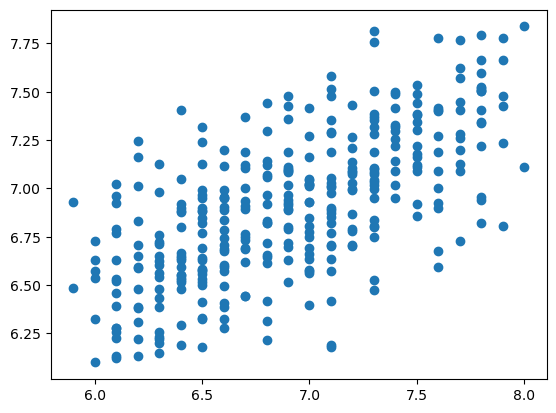

In [10]:
plt.scatter(y_test, predictions)
plt.show()

# there is a regression line

In [11]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2),)

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2),)

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2),)

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
0.31

MSE
0.15

RMSE:
0.39

R-squared:
0.43


# Analysis

In [12]:
# Create a dictionary with the metrics for each model
data = {
    'Metrics': ['MAE', 'MSE', 'RMSE', 'R-squared', 'RMSE (Original)'],
    'SVR': [0.14, 0.03, 0.17, 0.48, 0.37],
    'Log Reg': [0.14, 0.03, 0.18, 0.42, 0.39],
    'Random Forest Reg': [0.3, 0.15, 0.38, 0.46, None]
}

# Create a DataFrame from the dictionary
metrics = pd.DataFrame(data)

# Set the 'Metric' column as the index
metrics.set_index('Metrics', inplace=True)

# Display the DataFrame
metrics

,SVR,Log Reg,Random Forest Reg
Metrics,,,
MAE,0.14,0.14,0.30
MSE,0.03,0.03,0.15
RMSE,0.17,0.18,0.38
R-squared,0.48,0.42,0.46
RMSE (Original),0.37,0.39,NaN


Based on these metrics, the SVR model performs the best overall as it has the lowest MAE, MSE, RMSE, and highest R-squared value.